<a href="https://colab.research.google.com/github/abhinav4201/Capstone-Ted-talk-views-prediction/blob/main/TED_TALKS_Views_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color='#FF3206'>TED TALKS VIEWS PREDICTION**

---

A ***TED talk*** is a ***public speaking*** event in the form of ***recorded video*** presentation which was originally aired at the main TED annual event. **TED** refers to **Technology**, **Entertainment**, **Design**. TED Conferences, LLC is an American-Canadian non-profit media organization that has the main ideology of finding and sharing knowledge of the experts from different fields amoung the community.

TED was founded by **Richard Saul Wurman** and **Harry Marks** in February **1984** as a tech conference. Till date more than **13000** TED event has been held in **150 countries** by TED and its sister TEDx for free consumption by all sorts of people. TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. <u>Al Gore</u>, <u>Jimmy Wales</u>, <u>Shahrukh Khan</u>, and <u>Bill Gates</u> are among the luminaries on its speaker roster</u>.

<center><h2>“Identify your problems, but give your power and energy to solutions.”</h2></center>
<p align=right><b>~ Tony Robbins</b>, American author, coach, speaker, and philanthropist</p><br>

<center><img src="https://drive.google.com/uc?id=1GYFKSzG8Ri--DSr1VbMFgdPiPTLidoCT" width = "90%" height="260px" /> </center>

##**Objective**

---

The main goal is to create a **prediction model** using <u><b> Supervised Regression </b></u> so that it may be used to <u><b> foretell how many people will watch a certain video </b></u> that has been posted to TEDx website.

##**Importing Required Libraries**

---

All required libraries are imported at once in order to have smooth workflow. These libraries have used in data manipulation, plotting graphs, modelling etc.

In [2]:
# Here data visualization libraries(matplotlib,seaborn) are imported.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")
sns.set_context("poster");

# Importing numpy, pandas and tensorflow
import pandas as pd
import numpy as np
import tensorflow as tf
import ast

#importing rcParam
# from pylab import rcParams
# rcParams['figure.figsize'] = 8, 8

# Datetime library for manipulating Date columns.
from datetime import datetime
from datetime import timedelta
import calendar

# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more 
# suitable for the downstream estimators. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

# Importing various machine learning models.
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet 
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Importing model selection libraries.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# importing XGB regressor.
from xgboost import XGBRegressor

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, confusion_matrix

# Importing graphviz for visualizing decision trees.
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
 

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 50
pd.options.display.float_format = "{:.3f}".format

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

##**Loading Data**

---

In order to proceed, we have to bring in data into the playground. This is basically the raw data which we will filter into features so that it can be used to build the predictive model.

In [133]:
#here google drive is attached to colab so that files can be accessed easily
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
# path for the ted talk data is stored in the variable dataPath which was stored 
#   in google drive as "data_ted_talks.csv"
dataPath = "/content/drive/MyDrive/almabetter/Supervised-ML-Regression/SupervisedML-Regression-Ted Talks Views Prediction/Data/data_ted_talks.csv"

# finally the variable(dataPath) is used pandas data is loaded using to generate dataframe
tdTalks = pd.read_csv(dataPath)

##**Studying Data (Data Wrangling)**

---

Basic information about data is studied using head, info, describe function.

In [135]:
#displaying data from the ted_talk_data dataframe using head function 
tdTalks.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.000,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.000,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.000,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.000,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.000,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### **Different features and their description**
   
> A feature is an input variable in simple linear regression. A simple machine learning project might use a single feature, while a more sophisticated machine learning 
project could use millions of features.

> **Describing DataSet**

* talk_id: Talk identification number provided by TED (int)
* title: Title in which speaker will be speaking (string)
* speaker_1: Who is the first speaker in TED's speaker list (string)
* all_speakers: Total speakers in the session (dictionary)
* occupations: Profession of the speakers (dictionary)
* about_speakers: Brief about each speaker (dictionary)
* recorded_date: When the session was recorded (string)
* published_date: When the session was published to TED.com (string)
* event: Event or medium in which the talk was given (string)
* native_lang: The language the speaker has given the talk or session (string)
* available_lang: All languages in which the session was available (list)
* comments: Count of comments (int)
* duration: Duration in seconds (int)
* topics: Related tags or topics for the talk (list)
* related_talks: What are other talks related to the session (key= 'talk_id’ , value='title’) (dictionary)
* url: URL/Link of the talk, how it can be accessed (string)
* description: Nature of the session, why it was held, explaining the objective of the session (string)
* transcript: Full content of the video in the textual format (string)

In [136]:
#describe the dataset
#tdTalks.describe(include='all')
tdTalks.describe()

,talk_id,views,comments,duration
count,4005.000,4005.000,3350.000,4005.000
mean,12432.538,2148005.574,161.997,724.011
std,17447.576,3451225.524,268.839,361.775
min,1.000,0.000,0.000,60.000
25%,1252.000,882069.000,38.000,393.000
50%,2333.000,1375508.000,89.000,738.000
75%,23777.000,2133110.000,188.000,974.000
max,62794.000,65051954.000,6449.000,3922.000


*   For mixed data types provided via a DataFrame, the default is to return only an analysis of numeric columns. If the dataframe consists only of object and categorical data without any numeric columns, the default is to return an analysis of both the object and categorical columns. If include='all' is provided as an option, the result will include a union of attributes of each type.

In [137]:
#@title Printing information about a DataFrame including the index dtype and columns, non-null values and memory usage
tdTalks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o


> The dataset has total number of 4005 values with 19 different features. Therefore we can see that some of the feature like occupations, about_speaker, recorded_date and comments don't have 4005 entries and therefore has some null values. Apart from that, recorded_date and published_date has data type of object which should be further treated to have correct data type.  




In [138]:
#@title printing shape of the dataset
print(f'Shape : {tdTalks.shape}' )

Shape : (4005, 19)


In [139]:
tdTalks['views'].value_counts()

0          6
1454261    2
1446787    2
1968363    2
806149     2
          ..
1152255    1
2625338    1
727048     1
1704167    1
56582      1
Name: views, Length: 3996, dtype: int64

In [140]:
tdTalks['views'].isnull().sum()

0

### **Treating NaN or Null Values**

In [141]:
# Total count of NaN or Null Values in each column
tdTalks.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [142]:
# Missing Value Count Function
def showMissing():
    missing = tdTalks.columns[tdTalks.isnull().any()].tolist()
    return missing

missingVal = pd.DataFrame()
missingVal['Missing Data Count'] = tdTalks[showMissing()].isnull().sum().sort_values(ascending = False)
missingVal['Missing Data Percentage'] = tdTalks[showMissing()].isnull().sum().sort_values(ascending = False)/len(tdTalks)*100

print(missingVal)

                Missing Data Count  Missing Data Percentage
comments                       655                   16.355
occupations                    522                   13.034
about_speakers                 503                   12.559
all_speakers                     4                    0.100
recorded_date                    1                    0.025


*   From the above result, it is clear that features like ***occupations***, ***about_speakers***  and ***comments*** have most number of null or NaN or missing values and features like *all_speaker* and *recorded_date* has very few missing value. So to obtain a robust model these values should be treated. Since **comments** is the total count of comment in a particular talk, it will be replaced with **zero**. Features like ***occupations*** and ***about_speakers*** are replaced with word *'not available'*. Feature ***all speakers*** is replaced with *'speaker_1'* value. Lastly, as ***recorded_date*** is a date and it can not be zero and there is only one missing value, it's better to remove it. There are two possible ways to process these null value either drop the entire null or replace with value, however second approach can cause variance but as these value have very less percentage, so there is a chance it may cause less variance, therefore trying with the second approach as it will help in preserving data. Before proceeding further, repetion of value should also be checked. 

In [143]:
#checking duplicate value
tdTalks.duplicated().value_counts()

False    4005
dtype: int64

* **Dataset has 4005 unique value and there is no repetition.**

In [144]:
# creating duplicate of the data to preserve original
td = tdTalks.copy()


In [145]:
# Removing NULL values from 'all_speakers' , 'occupations' , 'about_speakers' , 'recorded_date' , 'comments' 

dataset= td.copy()

#dataset = td.dropna(subset=['all_speakers' , 'occupations' , 'about_speakers' , 'recorded_date' ])
#dataset["all_speakers"].fillna(value = str({0:"other"}), axis = 0, inplace=True)
dataset['occupations'].fillna(str({0:' Not available'}),inplace=True,axis=0)
#dataset['occupations']= dataset['occupations'].apply(ast.literal_eval)
dataset['about_speakers'].fillna(str({0:' Not available'}),inplace=True,axis=0)
#dataset['about_speakers']= dataset['about_speakers'].apply(ast.literal_eval)

for i,r in enumerate(dataset.to_dict('records')):
  if pd.isnull(r['all_speakers']):
    dct = {0:r['speaker_1']}
    dataset['all_speakers'][i] = str(dct)


dataset['comments'].fillna(0, inplace = True)
dataset = dataset.dropna(subset= ['recorded_date'])

cols_to_eval = ['all_speakers','occupations','about_speakers','available_lang','topics','related_talks']
for i in cols_to_eval:
  dataset[i] = dataset.apply(lambda row: eval(row[i]), axis=1)

In [146]:
# final check for null count
dataset.isnull().sum()

talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
about_speakers    0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64

* **Above result shows that all the null values has been removed.**

---



**Changing Date data type**

In [147]:
#changing date data type since it has object dtype
dataset['recorded_date'] = pd.to_datetime(dataset['recorded_date'], format = '%Y-%m-%d')
dataset['published_date'] = pd.to_datetime(dataset['published_date'], format = '%Y-%m-%d')
print(f'dtype => recorded_date : ', dataset['recorded_date'].dtype)
print(f'dtype => published_date : ', dataset['published_date'].dtype)

dtype => recorded_date :  datetime64[ns]
dtype => published_date :  datetime64[ns]


##### Extracting date, month, year from published date and adding to dataset

* In order to calculate the video age with respect to year and days, assuming the dataset was exported next day from last date available, which makes data to be atleast one day old i.e., adding 1 day to the last date available.

In [148]:
# extracting date, month, year from published date and adding to dataset

#Extracting month from published_date column
dataset['published_month'] = pd.DatetimeIndex(dataset['published_date']).month
dataset['published_month'] = dataset['published_month'].apply(lambda x: 
                                                    calendar.month_abbr[x])

#Extracting day from published_date column
dataset['published_day'] = pd.DatetimeIndex(dataset['published_date']).day

#Extracting year from published_date column
dataset['published_year'] = pd.DatetimeIndex(dataset['published_date']).year

#Extracting week day from published_date
dataset['dayofweek'] = dataset['published_date'].dt.day_name()
#converting day of week to day [1-mon,2-tue,3-wed,4-thr,5-fri,6-sat,7-sun]
dataset['dayofweek_num']= dataset['published_date'].apply(lambda a: a.strftime("%w")).astype('int64')

#calculating video age with respect to day by adding one day to last data value
dataset['video_age_day'] = dataset['published_date'].max() + timedelta(days=1)-(
                                   pd.DatetimeIndex(dataset['published_date']))
dataset['video_age_day'] = dataset['video_age_day'].dt.days
dataset.tail(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,related_talks,url,description,transcript,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,...,"{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...,Apr,28,2020,Tuesday,2,3
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},{0: ' Not available'},{0: ' Not available'},56582,2020-04-28,2020-04-30,TED-Ed,...,{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ...",Apr,30,2020,Thursday,4,1
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},{0: ' Not available'},{0: ' Not available'},0,2020-04-30,2020-04-30,TED-Ed,...,"{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...,Apr,30,2020,Thursday,4,1


#### Adding daily avg views

In [149]:
# adding avg daily views and yearly avg count
dataset['avg_daily_views'] = dataset['views'] / dataset['video_age_day']
dataset.tail(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,url,description,transcript,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day,avg_daily_views
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,...,https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...,Apr,28,2020,Tuesday,2,3,154804.667
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},{0: ' Not available'},{0: ' Not available'},56582,2020-04-28,2020-04-30,TED-Ed,...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ...",Apr,30,2020,Thursday,4,1,56582.000
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},{0: ' Not available'},{0: ' Not available'},0,2020-04-30,2020-04-30,TED-Ed,...,https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...,Apr,30,2020,Thursday,4,1,0.000


## <b>Exploratory Data Analysis</b>

---

Primary goal was to explore data, to identify relationship between different features to answer the question to achieve the objective of the project using **univariate analysis**, **bivariate analysis** and **multivariate analysis**. 

> What variables will actually drive views for the TED talks?

### **VISUALIZATION**

---

Different form of charts are used to visualize data with respect to views (target value), to know how it can be related to other features. Visualization is carried out using **seaborn** and **matplotlib** library.

#### **Univariate analysis**
> * Analysis using one variable.
      * Plotting numeric values to see how it affects.
      * Finding the top occupation who are active member of event.

##### Views

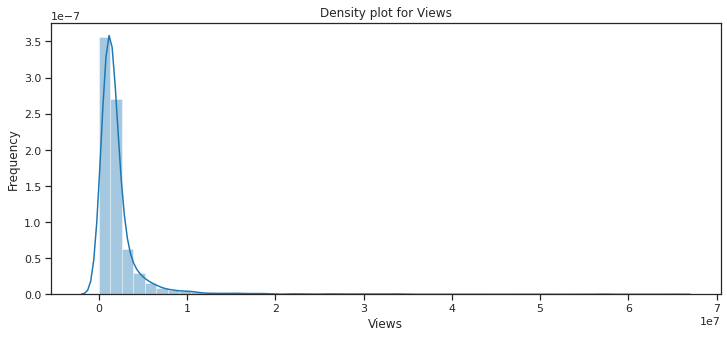

In [150]:
#code to print density plot for views
plt.figure(figsize=(12,5))
sns.distplot(dataset['views'])
plt.title("Density plot for Views")
plt.ylabel("Frequency");
plt.xlabel("Views");

* **Above graph shows <u>Views</u> is positively skewed i.e., there are outliers in the feature( Mean  >  Median  >  Mode). Views are higly densed between 0-1 (le7) range.** 

##### Comments

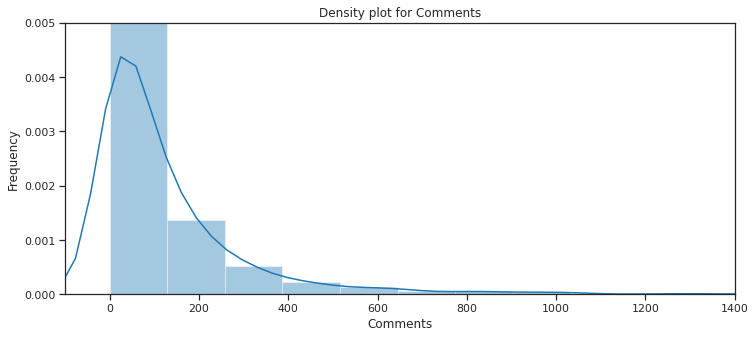

In [151]:
#code to print density plot for comments
plt.figure(figsize=(12,5))
sns.distplot(dataset['comments'])
plt.title("Density plot for Comments")
plt.ylabel("Frequency");
plt.xlabel("Comments");
plt.axis([-100,1400 , 0 , 0.005]);

##### Duration

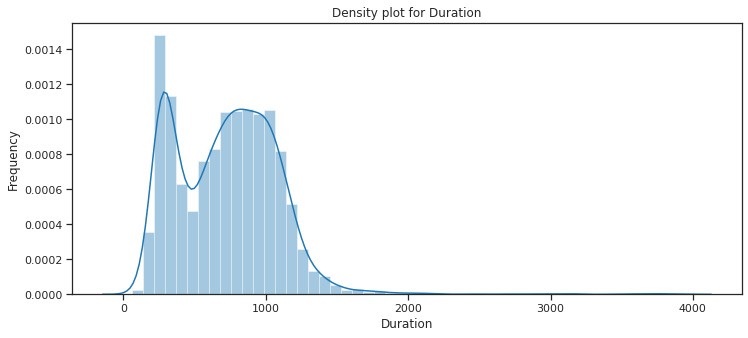

In [152]:
#code to print density plot for duration
plt.figure(figsize=(12,5))
sns.distplot(dataset['duration'])
plt.title("Density plot for Duration")
plt.ylabel("Frequency");
plt.xlabel("Duration");

*  **Above graph shows that most of the talk has duration lies between 0 - 2000 and few of them have more than 2000.**

##### Top Occupation

In [153]:
dataset['occupations'] = dataset.apply(lambda row : row['occupations'][0][0],axis=1)

In [154]:
# checking top occupation and getting top 10 value
top_occ = dataset['occupations'].value_counts()[1:].head(10).reset_index()
top_occ

,index,occupations
0,writer,99
1,author,74
2,journalist,68
3,artist,67
4,entrepreneur,61
5,designer,56
6,neuroscientist,47
7,architect,46
8,inventor,41
9,psychologist,38


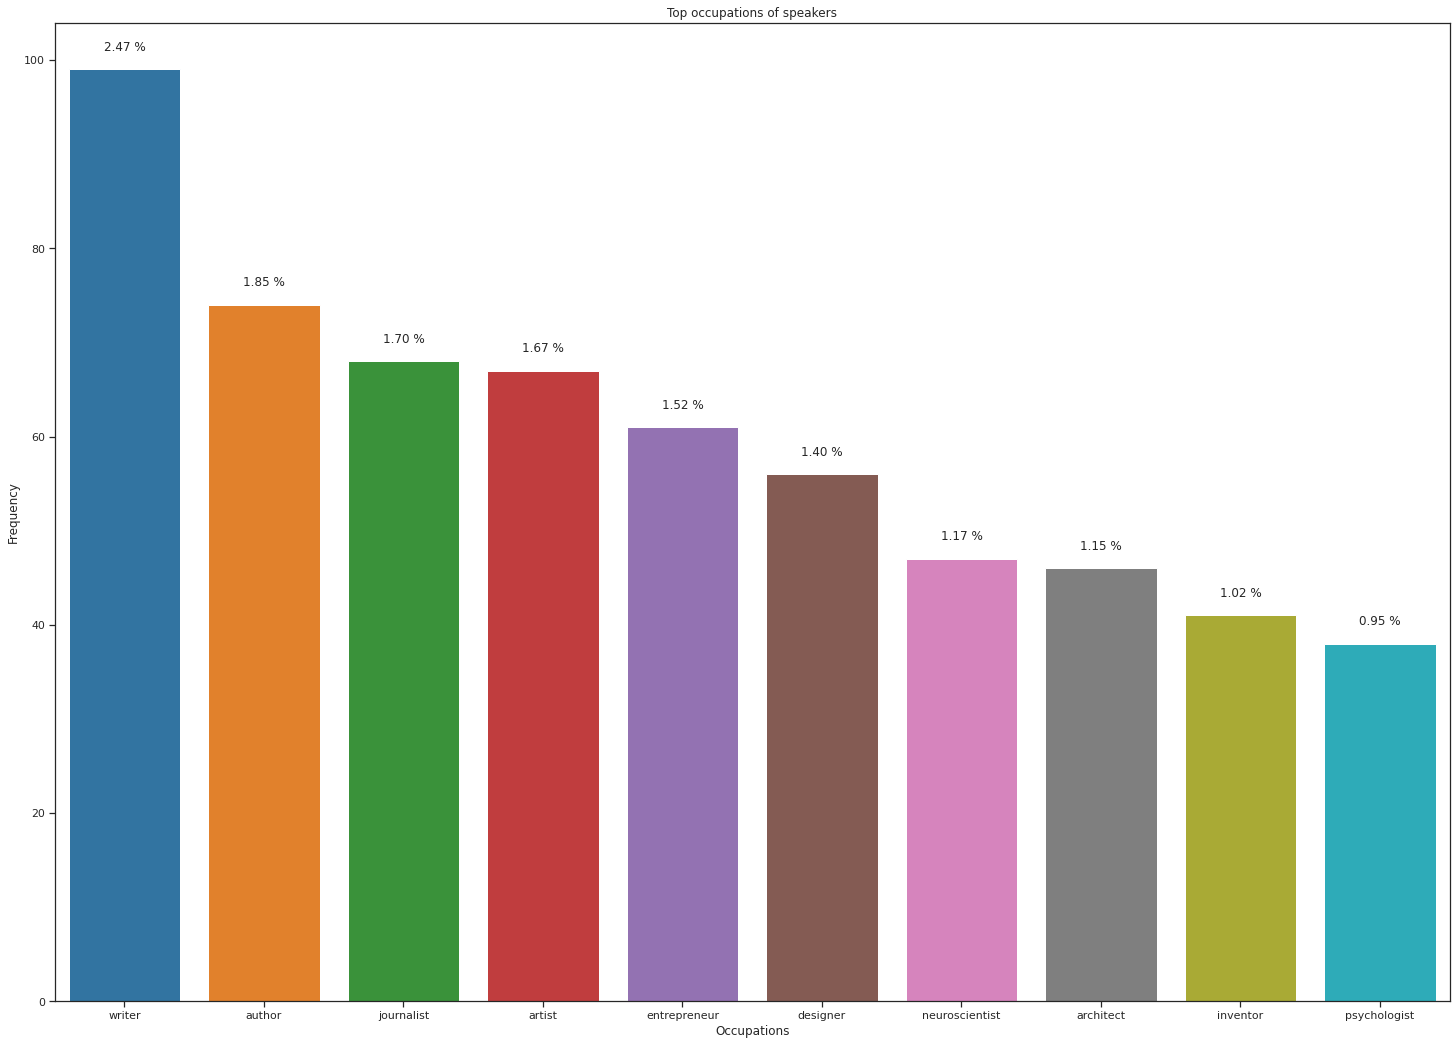

In [155]:
plt.figure(figsize=(25,18));
plt.title('Top occupations of speakers');
ax = sns.barplot(x='index',y='occupations',data=top_occ);
plt.xlabel("Occupations");
plt.ylabel('Frequency');
for i,p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 2, '{:1.2f} %'.format(height *100 / len(dataset[dataset['occupations'] != 'O'])), ha="center")

* **Writers are the most frequent speakers.** 

---



##### Year

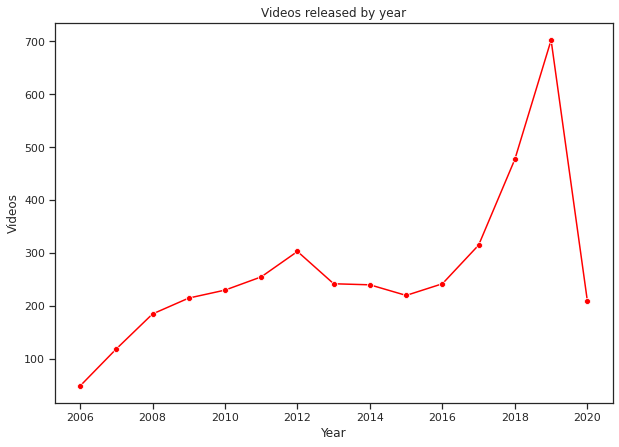

In [156]:
plt.figure(figsize=(10,7))
sns.lineplot(data=dataset['published_year'].value_counts(), marker= 'o', color = 'red');
plt.xlabel('Year');
plt.ylabel('Videos');
plt.title('Videos released by year');

* The event were increasing with year, however during 2020, it drastically reduced which was all because of the pandemic.

##### Topic 

In [157]:
topic = pd.DataFrame(dataset['topics'].explode().value_counts()).reset_index().head(10)

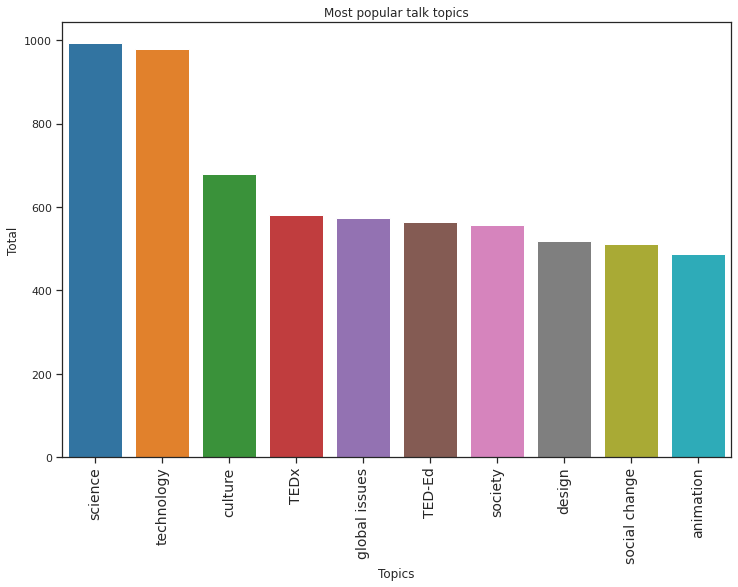

In [158]:
plt.figure(figsize=(12,8));
plt.title('Most popular talk topics');
sns.barplot(x='index',y= 'topics',data= topic);
plt.xlabel("Topics");
plt.ylabel('Total');
plt.xticks(fontsize = 14, rotation = 90);

* **It is clear that science and technology has most number of talk.**

In [159]:
dataset['topic_count'] = dataset['topics'].apply(lambda a: len(a))
dataset.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,description,transcript,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day,avg_daily_views,topic_count
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},climate advocate,{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Jun,27,2006,Tuesday,2,5057,696.736,9


---
#### **Bivariate Analysis**

> * Analysis using two variable.
      * Trying to relate with our target variable views.


##### Speaker 

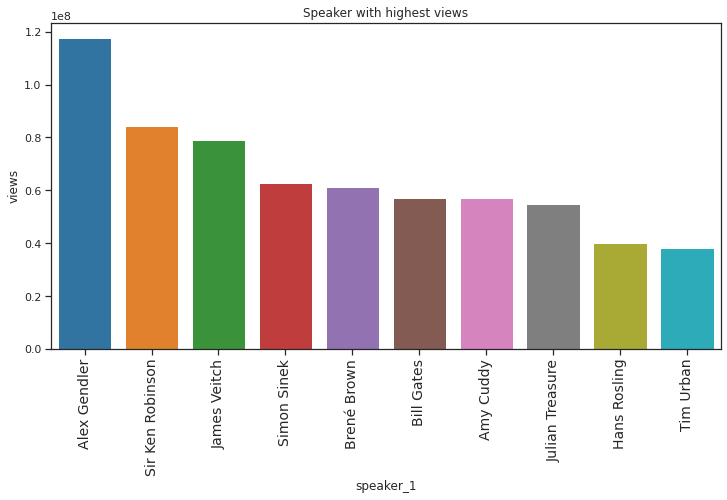

In [160]:
#@title Plotting speaker_1 vs views
chart_data = pd.concat([dataset['speaker_1'],dataset['avg_daily_views'],
                        dataset['views'],], axis=1)
chart_data_s_1 = chart_data.groupby(['speaker_1'],as_index = False)['views'].sum().sort_values(
																																			'views',ascending=False).head(10)
plt.figure(figsize = (12,6));
sns.barplot(data= chart_data_s_1, x='speaker_1',y= 'views');
plt.xticks(fontsize = 14, rotation = 90);
plt.title('Speaker with highest views');

*  **Alex Gendler has highest views count.**

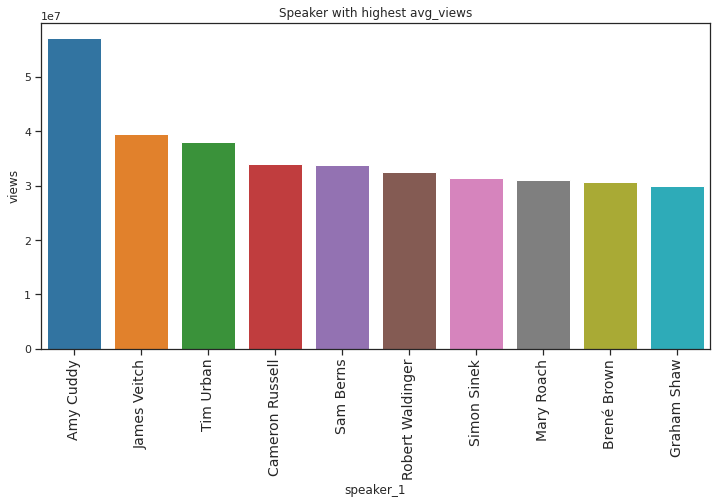

In [161]:
#@title Plotting speaker_1 vs Avg_views
midd = chart_data.groupby(['speaker_1'])['views'].mean().reset_index().sort_values(
																								'views', ascending = False)[:10]
plt.figure(figsize = (12,6));
sns.barplot(data= midd, x='speaker_1',y= 'views');
plt.xticks(fontsize = 14, rotation = 90);
plt.title('Speaker with highest avg_views');

* **Amy Cuddy has highest daily view count.**

##### Published date

###### Day of week vs views

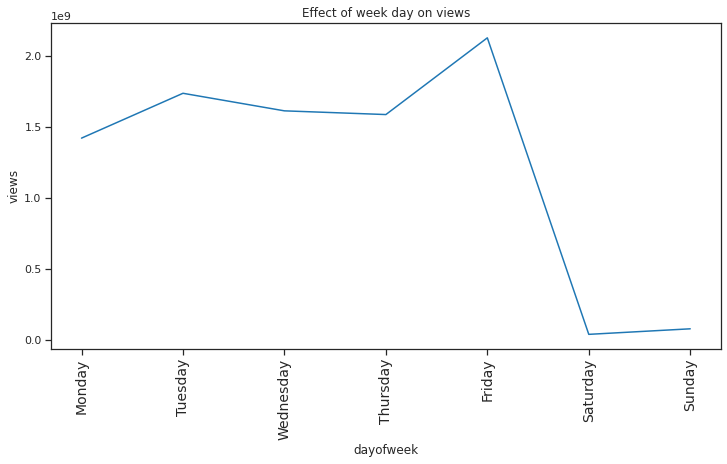

In [162]:
#plotting week day vs views line chart
chart_data_2 = pd.concat([dataset['dayofweek'], dataset['views'],], axis=1)
chart_data_2 = chart_data_2.groupby(['dayofweek'],as_index = False)['views'].sum().sort_values(
																																			'views',ascending=False).head(10)
weekdays = {'dayofweek':['Monday','Tuesday','Wednesday','Thursday','Friday',	'Saturday',	'Sunday']}
weekday = pd.DataFrame(weekdays)
chart = weekday.merge(chart_data_2)
plt.figure(figsize = (12,6));
sns.lineplot(data= chart, x='dayofweek',y= 'views');
plt.xticks(fontsize = 14, rotation = 90);
plt.title('Effect of week day on views');

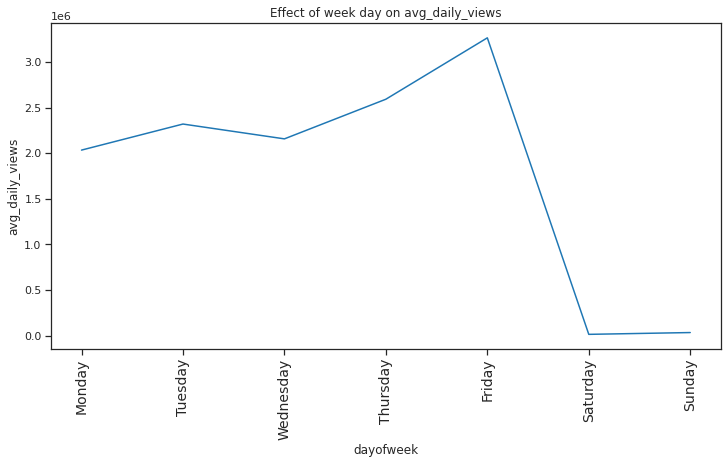

In [163]:
chart_data_2 = pd.concat([dataset['dayofweek'], dataset['avg_daily_views'],], axis=1)
chart_data_2 = chart_data_2.groupby(['dayofweek'],as_index = False)['avg_daily_views'].sum().sort_values(
																																			'avg_daily_views',ascending=False).head(10)
weekdays = {'dayofweek':['Monday','Tuesday','Wednesday','Thursday','Friday',	'Saturday',	'Sunday']}
weekday = pd.DataFrame(weekdays)
chart = weekday.merge(chart_data_2)
plt.figure(figsize = (12,6));
sns.lineplot(data= chart, x='dayofweek',y= 'avg_daily_views');
plt.xticks(fontsize = 14, rotation = 90);
plt.title('Effect of week day on avg_daily_views');

* **Talk published on Friday has most number of views.**

###### Avg views per year

In [164]:
avg_view_year = dataset.groupby(['published_year'])['views'].mean().reset_index()

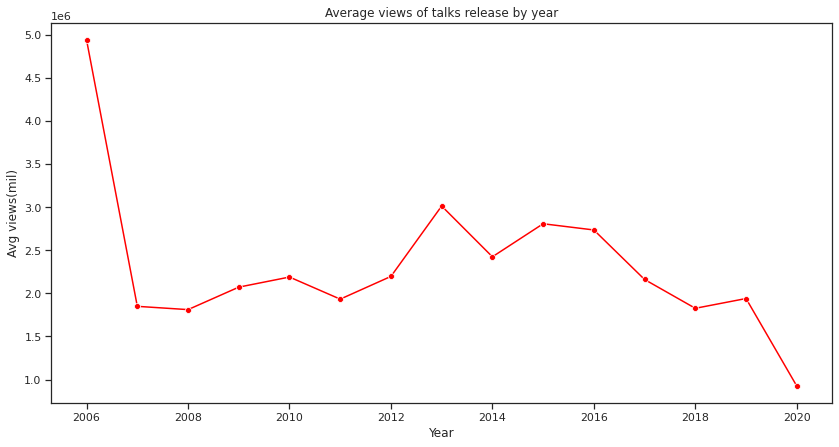

In [165]:
plt.figure(figsize=(14,7));
ax = sns.lineplot(data=avg_view_year, x="published_year", y="views", marker= 'o', color = 'red');
plt.xlabel('Year');
plt.ylabel('Avg views(mil)');
plt.title('Average views of talks release by year');

* Initial release showed a promising hit on the market, however it shows a drastic dip with a constant fluctuation and again a dip due to the pandemic in the the year 2020.

##### Duration 

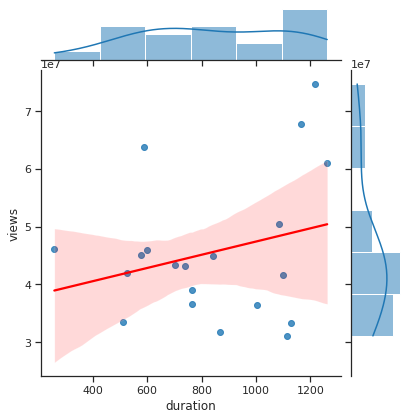

In [166]:
chart_data_3 = dataset.groupby(['duration'],as_index = False)['views'].sum().sort_values(
																																			'views',ascending=False).head(20)
sns.jointplot(data=chart_data_3,x='duration', y='views', kind='reg',joint_kws={'line_kws':{'color':'red'}});
# plt.figure(figsize = (25,10));
# sns.lineplot(data= chart_data_3, x='duration',y= 'views');
# plt.xticks(fontsize = 14, rotation = 90);
# plt.title('Effect of Duration on views');

##### Event 

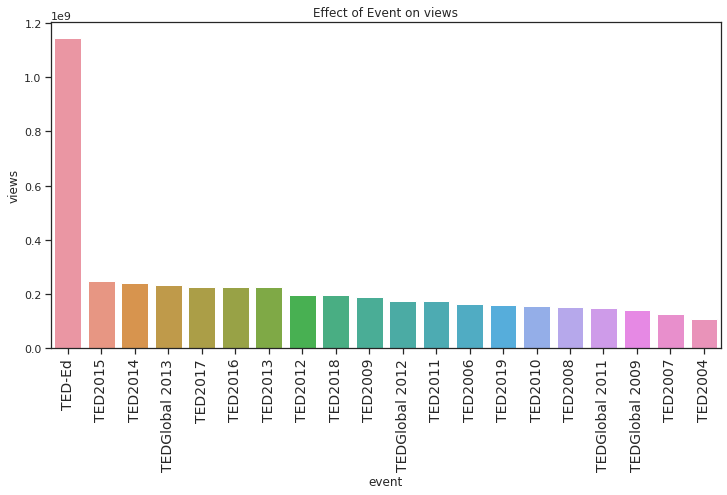

In [167]:
chart_data_4 = dataset.groupby(['event'],as_index = False)['views'].sum().sort_values(
																																			'views',ascending=False).head(20)
plt.figure(figsize = (12,6));
sns.barplot(data= chart_data_4, x='event',y= 'views');
plt.xticks(fontsize = 14, rotation = 90);
plt.title('Effect of Event on views');

* **TED-Ed has most number of views.**

Event vs avg views

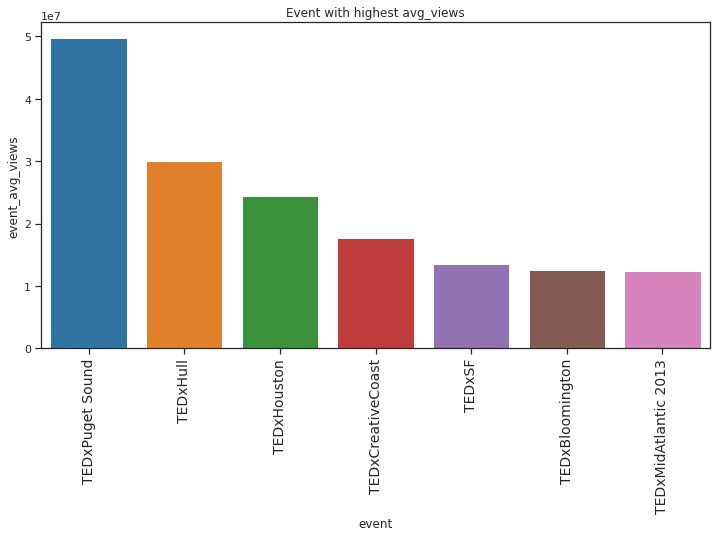

In [168]:
# calculating avg view for each event
event_data = dataset.groupby(['event']).agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
event_data = event_data.to_dict()
event_data = event_data.values()
event_data = list(event_data)[0]
dataset['event_avg_views'] = dataset['event'].map(event_data)
mid = dataset[['event','event_avg_views']].sort_values(['event_avg_views'], ascending = False).head(10)
plt.figure(figsize = (12,6));
sns.barplot(data= mid, x='event',y= 'event_avg_views');
plt.xticks(fontsize = 14, rotation = 90);
plt.title('Event with highest avg_views');

##### Comments 

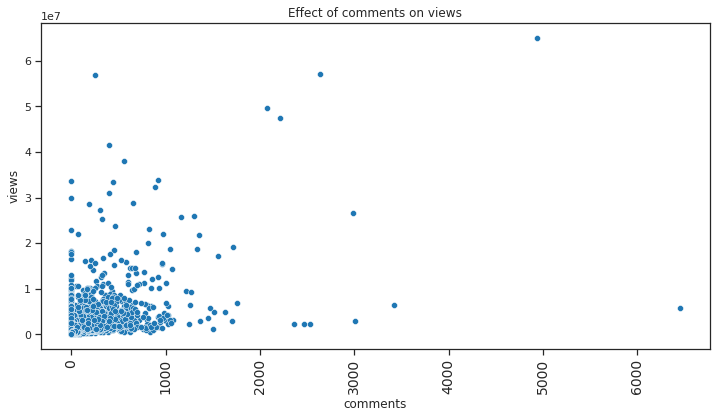

In [169]:
# chart_data_5 = dataset.groupby(['comments'],as_index = False)['views'].sum().sort_values(
# 																																			'views',ascending=False).head(20)
chart_data_5 = dataset[['comments', 'views']]
plt.figure(figsize = (12,6));
sns.scatterplot(data= chart_data_5, x='comments',y= 'views');
plt.xticks(fontsize = 14, rotation = 90);
plt.title('Effect of comments on views');


* **Above graph shows there might be linear relation with a positive skewness.**

##### Language

In [170]:
#plotting native language vs views graph
nat_lang = dataset.groupby(['native_lang'])['views'].sum().reset_index().sort_values(
              'views', ascending = False).head(12)
nat_lang

,native_lang,views
2,en,8560078411
3,es,18624686
4,fr,8843261
6,it,3466037
8,ko,2057706
7,ja,2040853
0,ar,1452611
11,zh-cn,1368494
10,pt-br,1167889
5,hi,1153704


* **Talk presented with english as the native language has highest views, followed by spanish and french language.**

In [171]:
# total language count 
dataset['aval_lang_count'] = dataset['available_lang'].apply(lambda a: len(a))
dataset.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day,avg_daily_views,topic_count,event_avg_views,aval_lang_count
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},climate advocate,{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,Jun,27,2006,Tuesday,2,5057,696.736,9,3876290.786,43


In [172]:
#total related talk
dataset['rel_talk_count'] = dataset['related_talks'].apply(lambda a: len(a))
dataset.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,published_day,published_year,dayofweek,dayofweek_num,video_age_day,avg_daily_views,topic_count,event_avg_views,aval_lang_count,rel_talk_count
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},climate advocate,{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,27,2006,Tuesday,2,5057,696.736,9,3876290.786,43,6


---
#### **Multivariate Analysis**

> * Analysis with more than two variable.
      * Trying to relate with our target variable views.

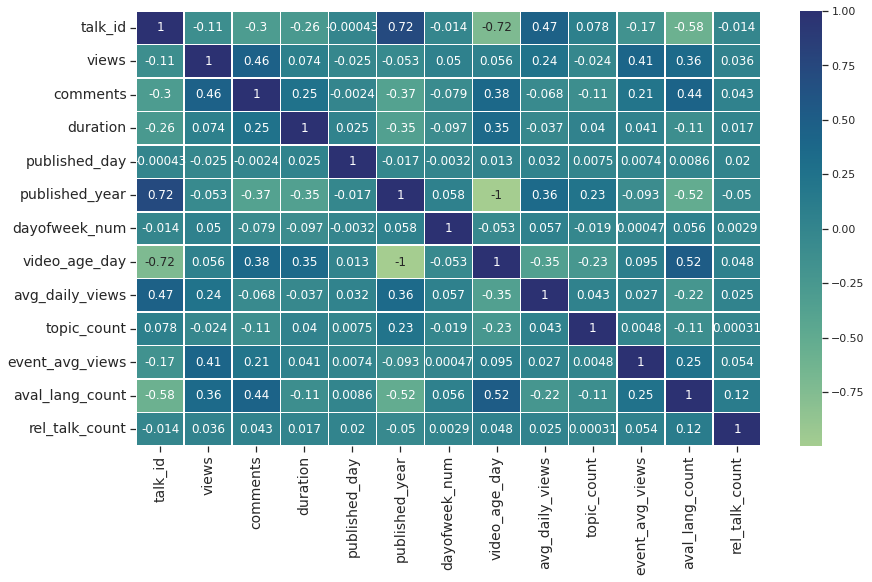

In [173]:
# plotting heatmap with correlation value to check relation between multiple variable
sns.set_context('notebook')
plt.figure(figsize = (14,8))
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
sns.heatmap(dataset.corr(), annot=True, linewidth=.5,cmap="crest");

* As there is no direct linear relation between some feature with target variable, so omitting unnecessary columns.

In [174]:
dataset.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'published_month',
       'published_day', 'published_year', 'dayofweek', 'dayofweek_num',
       'video_age_day', 'avg_daily_views', 'topic_count', 'event_avg_views',
       'aval_lang_count', 'rel_talk_count'],
      dtype='object')

In [175]:
new_feature = dataset.copy()

In [176]:
# omitting columns that show less correlations
new_feature.drop(axis = 1, labels = ['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
                                    'about_speakers', 'recorded_date', 'published_date', 'event',
                                    'native_lang', 'available_lang', 'topics','related_talks', 'url', 
                                     'description', 'transcript', 'published_month',
                                    'published_day', 'dayofweek', 'avg_daily_views'], inplace = True)
new_feature.columns

Index(['views', 'comments', 'duration', 'published_year', 'dayofweek_num',
       'video_age_day', 'topic_count', 'event_avg_views', 'aval_lang_count',
       'rel_talk_count'],
      dtype='object')

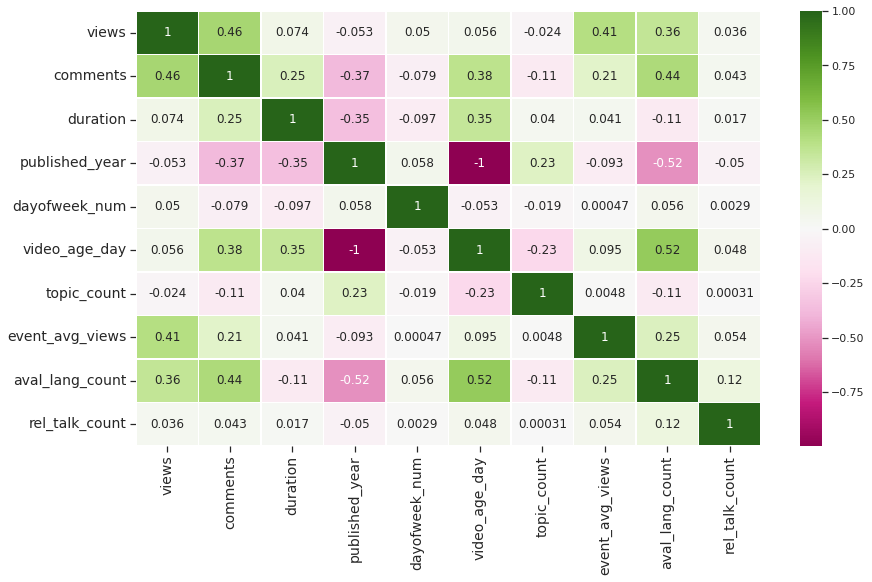

In [177]:
#plotting heatmap again with the new feature
sns.set_context('notebook')
plt.figure(figsize = (14,8))
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
sns.heatmap(new_feature.corr(), annot=True, linewidth=.5,cmap="PiYG");

### **Conclusion**

---

Based on univariate, bivariate and multivariate analysis, different conclusions are achieved:

1. Comments show positive skewness.
2. Writers are most active members.
3. Except the pandemic year 2020, TED events has been dynamically increased.
4. Science and Technology have most number of talk.
5. Alex Gendler is the most popular speaker with highest views.
5. Video uploaded on Friday has maximum number of views.
6. Comment shows linear relation with views i.e., people tend to engage in video with comments.
7. Video uploaded in english as native language has worldwide reach and therefore has highest views.
8. Video available in different language shows positive relation with views.



## **Feature Engineering**

In [ ]:
#Dropping reduntant columns 
dataset.drop(['talk_id','url'],axis=1,inplace=True)

In [ ]:
#categorizing data based on type
numerical, categorical = [], []

for col in dataset.columns:
    if dataset[col].dtype == 'int' or dataset[col].dtype == 'float64':
        numerical.append(col)
    else:
        categorical.append(col)
        
print('Numerical features: ', numerical)
print('Categorical features: ', categorical)

Numerical features:  ['views', 'comments', 'duration']
Categorical features:  ['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'recorded_date', 'published_date', 'event', 'native_lang', 'available_lang', 'topics', 'related_talks', 'description', 'transcript']
